Question 9

Load a medical diagnosis dataset. What are the features and target variables in the dataset? Are there any missing values? Check the distribution of the target variable. Is it balanced or imbalanced? How might this affect your model? Identify and handle missing values in the dataset. Explain the method you used (mean/median imputation, mode, or removal,knn-imputer). Convert categorical variables into numerical ones using one-hot encoding or label encoding. Which method did you choose, and why? Scale the features if necessary. Why might scaling be important for logistic regression?  Split the dataset into training and testing sets (e.g., 80% training, 20% testing). Why is this step important? Evaluate its accuracy and confusion matrix, f1-score, precision, recall and ROC curve. Interpret the results.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2,3.0,0
1,53,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0,3.0,0
2,70,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0,3.0,0
3,61,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1,3.0,0
4,62,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3,2.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1023 non-null   float64
 2   cp        1024 non-null   float64
 3   trestbps  1022 non-null   float64
 4   chol      1022 non-null   float64
 5   fbs       1022 non-null   float64
 6   restecg   1023 non-null   float64
 7   thalach   1022 non-null   float64
 8   exang     1024 non-null   float64
 9   oldpeak   1022 non-null   float64
 10  slope     1022 non-null   float64
 11  ca        1025 non-null   int64  
 12  thal      1021 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age         0
sex         2
cp          1
trestbps    3
chol        3
fbs         3
restecg     2
thalach     3
exang       1
oldpeak     3
slope       3
ca          0
thal        4
target      0
dtype: int64

In [8]:
df['sex'].value_counts()

sex
1.0    711
0.0    312
Name: count, dtype: int64

In [9]:
df['restecg'].value_counts()

restecg
1.0    512
0.0    496
2.0     15
Name: count, dtype: int64

In [10]:
df['slope'].value_counts()

slope
1.0    480
2.0    468
0.0     74
Name: count, dtype: int64

In [11]:
df['exang'].value_counts()

exang
0.0    680
1.0    344
Name: count, dtype: int64

In [12]:
df['thal'].value_counts()

thal
2.0    541
3.0    409
1.0     64
0.0      7
Name: count, dtype: int64

In [13]:
df['cp'].value_counts()

cp
0.0    497
2.0    283
1.0    167
3.0     77
Name: count, dtype: int64

In [14]:
df['fbs'].value_counts()

fbs
0.0    870
1.0    152
Name: count, dtype: int64

In [15]:
df['sex']=df['sex'].fillna(1)

In [16]:
df['cp']=df['cp'].fillna(0)

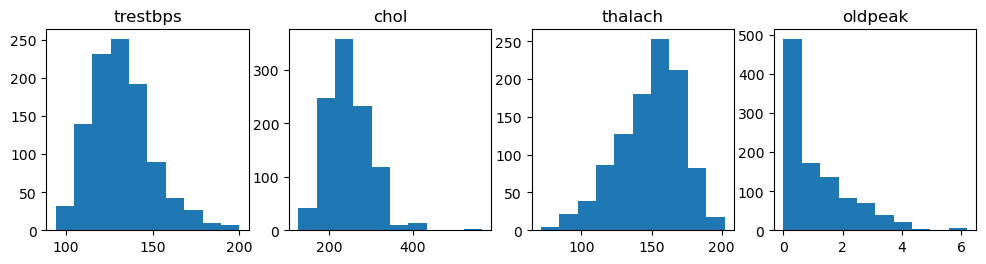

In [17]:
plt.figure(figsize=(12,12))
plt.subplot(4,4,1)
plt.hist(df['trestbps'])
plt.title('trestbps')
plt.subplot(4,4,2)
plt.hist(df['chol'])
plt.title('chol')
plt.subplot(4,4,3)
plt.hist(df['thalach'])
plt.title('thalach')
plt.subplot(4,4,4)
plt.hist(df['oldpeak'])
plt.title('oldpeak')
plt.show()

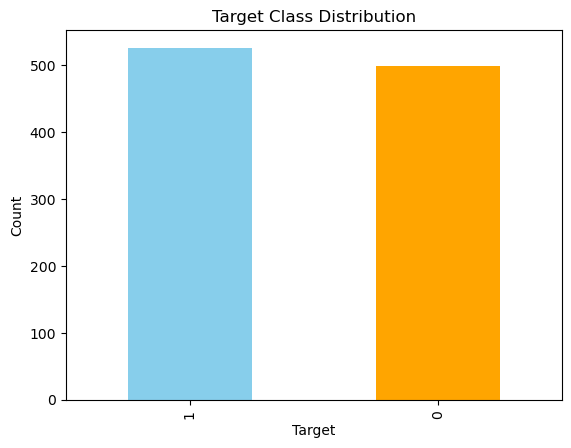

In [18]:
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

In [19]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].median())

In [20]:
df['thalach']=df['thalach'].fillna(df['thalach'].median())

In [21]:
df['chol']=df['chol'].fillna(df['chol'].median())

In [22]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

In [67]:
from sklearn.impute import KNNImputer

In [71]:
kni=KNNImputer(n_neighbors=5)

In [73]:
kni.fit_transform(df)

array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [53.,  1.,  0., ...,  0.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [47.,  1.,  0., ...,  1.,  2.,  0.],
       [50.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])

In [75]:
#df['restecg']=df['restecg'].fillna(1)

In [77]:
#df['slope']=df['slope'].fillna(1)

In [79]:
#df['exang']=df['exang'].fillna(0)

In [81]:
#df['thal']=df['thal'].fillna(2)

In [83]:
#df['fbs']=df['fbs'].fillna(1)

In [85]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   float64
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   float64
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   float64
 13  target    1025 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 112.2 KB


In [89]:
from sklearn.linear_model import LinearRegression

In [91]:
lr=LinearRegression()

In [93]:
y=df['target'].values
x=df.iloc[:,:-1].values

In [95]:
x.shape

(1025, 13)

In [97]:
y.shape

(1025,)

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((820, 13), (820,), (205, 13), (205,))

In [105]:
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred=lr.predict(x_test)

In [145]:
from sklearn.metrics import r2_score,confusion_matrix,classification_report,roc_curve,RocCurveDisplay,accuracy_score,auc

In [111]:
r2_score(y_test,y_pred)

0.5857118953212169

In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr=LogisticRegression()

In [117]:
from sklearn.preprocessing import StandardScaler

In [119]:
scale=StandardScaler()

In [121]:
x_scaled=scale.fit_transform(x_train)

In [123]:
lr.fit(x_scaled,y_train)

LogisticRegression()

In [125]:
x_t_scaled=scale.fit_transform(x_test)

In [127]:
y_pred=lr.predict(x_t_scaled)

In [131]:
accuracy_score(y_test,y_pred)

0.8878048780487805

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.92      0.88      0.90       121

    accuracy                           0.89       205
   macro avg       0.88      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [157]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)

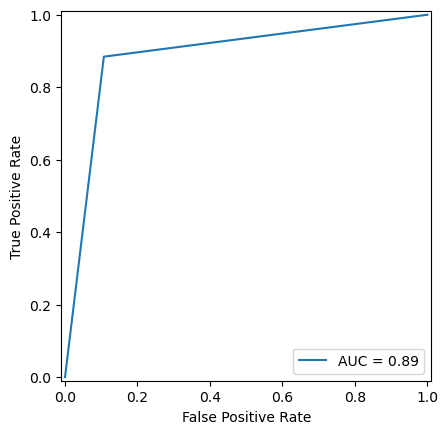

In [163]:
display.plot()
plt.show()